Predciting Attrition

https://raw.githubusercontent.com/Dvshverma10/Evaluation-project-Phase-/main/First%20Phase%20Evaluation%20Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv

In [1]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [12]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/Dvshverma10/Evaluation-project-Phase-/main/First%20Phase%20Evaluation%20Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_raw.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


# Non Graphical Analysis

In [13]:
# Check the size & info

print(df_raw.shape)

df_raw.info()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

No null values, 1470 rows & 35 columns

numeric labels: (26),
Non numeric labels (9)


<Axes: >

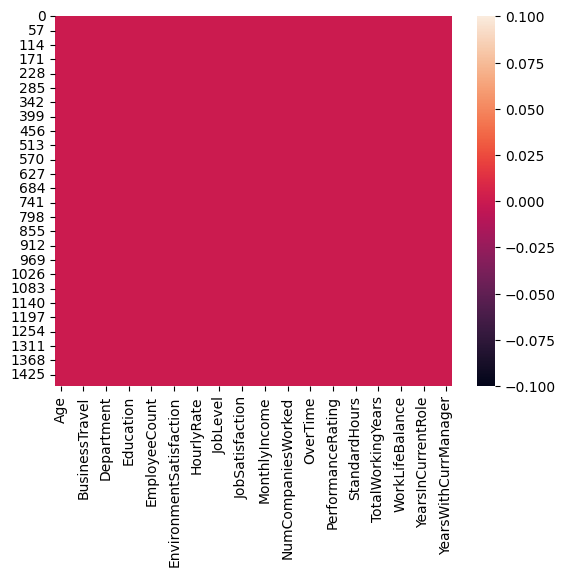

In [14]:
# Visualize non null values using heat-map

sns.heatmap(df_raw.isnull())

No null values as visulaized in Heatmap

In [15]:
# check statistical summary

df_raw.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Employee count, Over18, StandardHours is constant = 1 , can be dropped
* Employee number is just Identiifer can be dropped


In [16]:
df_raw.drop(['EmployeeCount', 'EmployeeNumber','Over18', 'StandardHours'], axis=1, inplace = True)
print(df_raw.shape)

df_raw.info()

(1470, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfacti

No null values, object needs to be encoded

In [17]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique())

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [18]:
# Applying Label Encoder on categorical data (Object)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_raw['Attrition'] = le.fit_transform(df_raw['Attrition'])
df_raw['BusinessTravel'] = le.fit_transform(df_raw['BusinessTravel'])
df_raw['Department'] = le.fit_transform(df_raw['Department'])
df_raw['EducationField'] = le.fit_transform(df_raw['EducationField'])
df_raw['Gender'] = le.fit_transform(df_raw['Gender'])
df_raw['JobRole'] = le.fit_transform(df_raw['JobRole'])
df_raw['MaritalStatus'] = le.fit_transform(df_raw['MaritalStatus'])
df_raw['OverTime'] = le.fit_transform(df_raw['OverTime'])
df_raw.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
873,36,0,2,917,1,6,4,1,3,1,...,3,3,1,7,4,3,7,7,1,7
533,40,0,1,580,2,5,4,1,4,1,...,4,3,1,20,2,3,18,13,1,12
1405,31,0,0,697,1,10,3,3,3,0,...,4,3,1,13,2,4,11,7,4,8


*values are encoded now per going through graphical analysis*

# GRAPHICAL ANALYSIS

UNIVARIATE

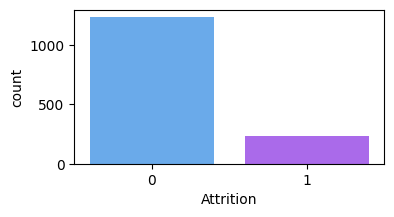

0    1233
1     237
Name: Attrition, dtype: int64


In [19]:
# Attrition distrubution


mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['Attrition'], palette = 'cool')
mp.show()

print(df_raw['Attrition'].value_counts())

Attrition : the target label is highly imbalanced, need to apply SMOTE to balance the data

In [20]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.drop('Attrition', axis=1, inplace = False)
y = df_raw['Attrition']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_hr_bal = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_hr_bal['Attrition'] = y_resampled

print(df_hr_bal.shape)

df_hr_bal.head(4)

(1470, 30)
(1470,)
(2466, 30)
(2466,)
(2466, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0


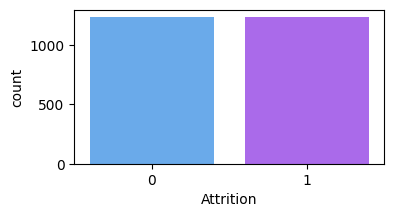

1    1233
0    1233
Name: Attrition, dtype: int64


In [21]:
# Attrition distrubution after SMOTE

mp.figure(figsize=(4,2))
sns.countplot(x=df_hr_bal['Attrition'], palette = 'cool')
mp.show()

print(df_hr_bal['Attrition'].value_counts())

Balanced data using SMOTE

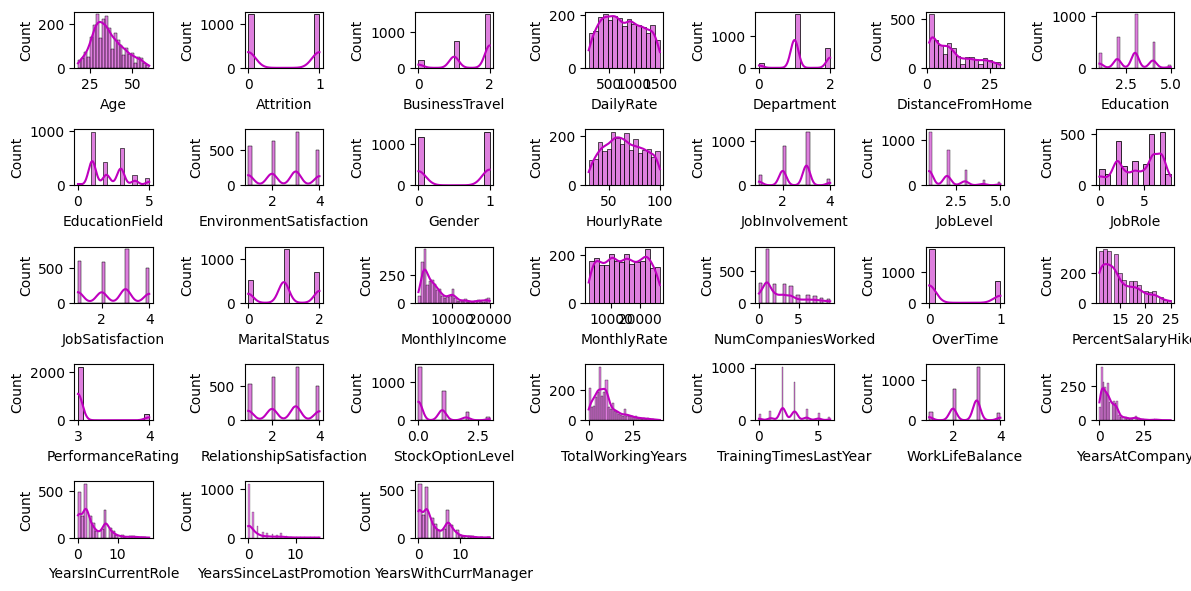

In [22]:
# Histplot to check distribution

mp.figure(figsize=(12,6))
pnum = 1

for index in df_hr_bal.columns.to_list():
  if(pnum<=31):
    ax = mp.subplot(5,7, pnum)
    sns.histplot(df_hr_bal[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Histplot indicates most of the columns are skewed and have high standard deviation.

Check Outliers using Boxplot

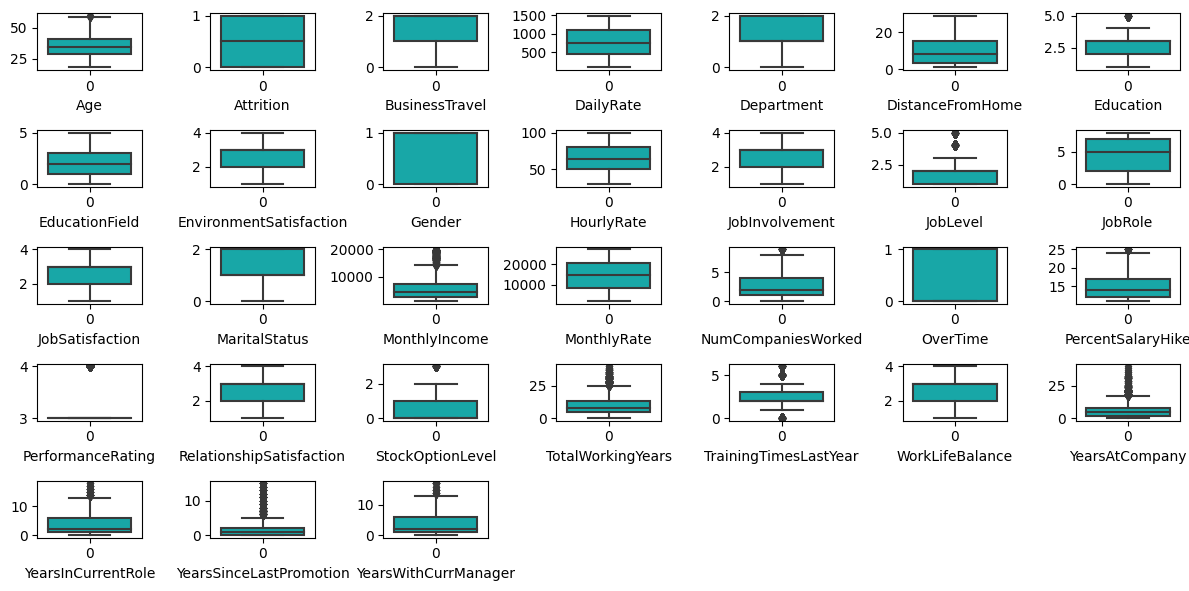

In [23]:
# Box Plot of columns to check for outliers

# Box plot to visualize outliers

mp.figure(figsize=(12,6))
pnum = 1

for index in df_hr_bal.columns.to_list():
  if(pnum<=31):
    ax = mp.subplot(5,7, pnum)
    sns.boxplot(df_hr_bal[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Some outliers can be seen in few labels

BIVARIATE ANALYSIS

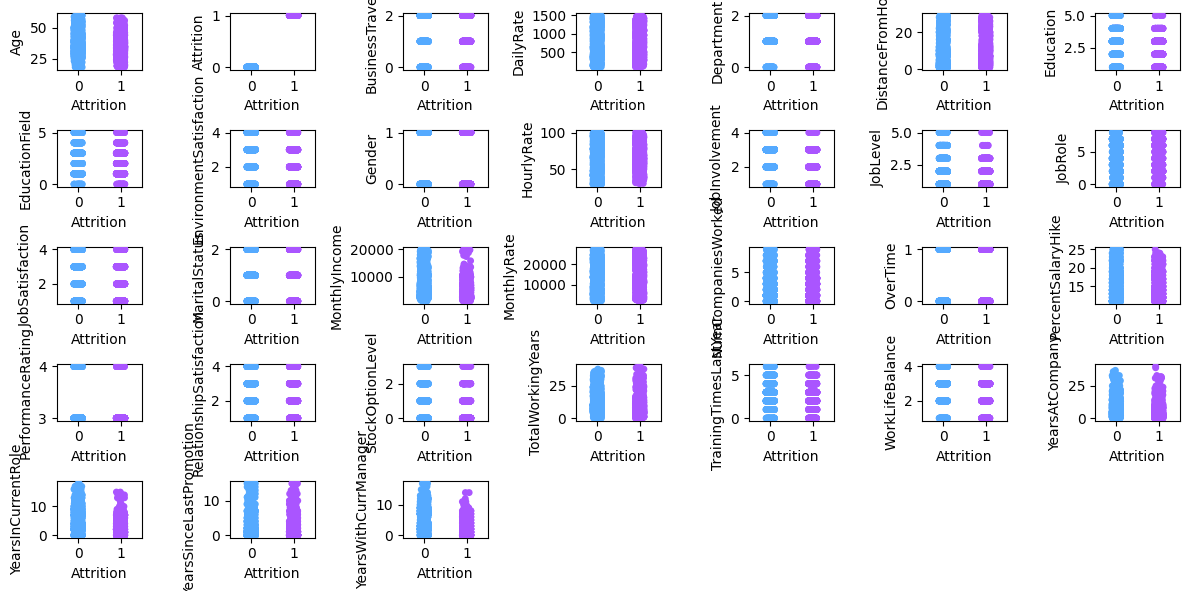

In [24]:
# Striplot to understand relation between independent labels with target labels

mp.figure(figsize=(12,6))
pnum = 1

for index in df_hr_bal.columns.to_list():
  if(pnum<=31):
    ax = mp.subplot(5,7, pnum)
    sns.stripplot(x=df_hr_bal['Attrition'], y =df_hr_bal[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Attrition = 0 is higher when Years at current role is high

# MULTIVARIATE

<Axes: >

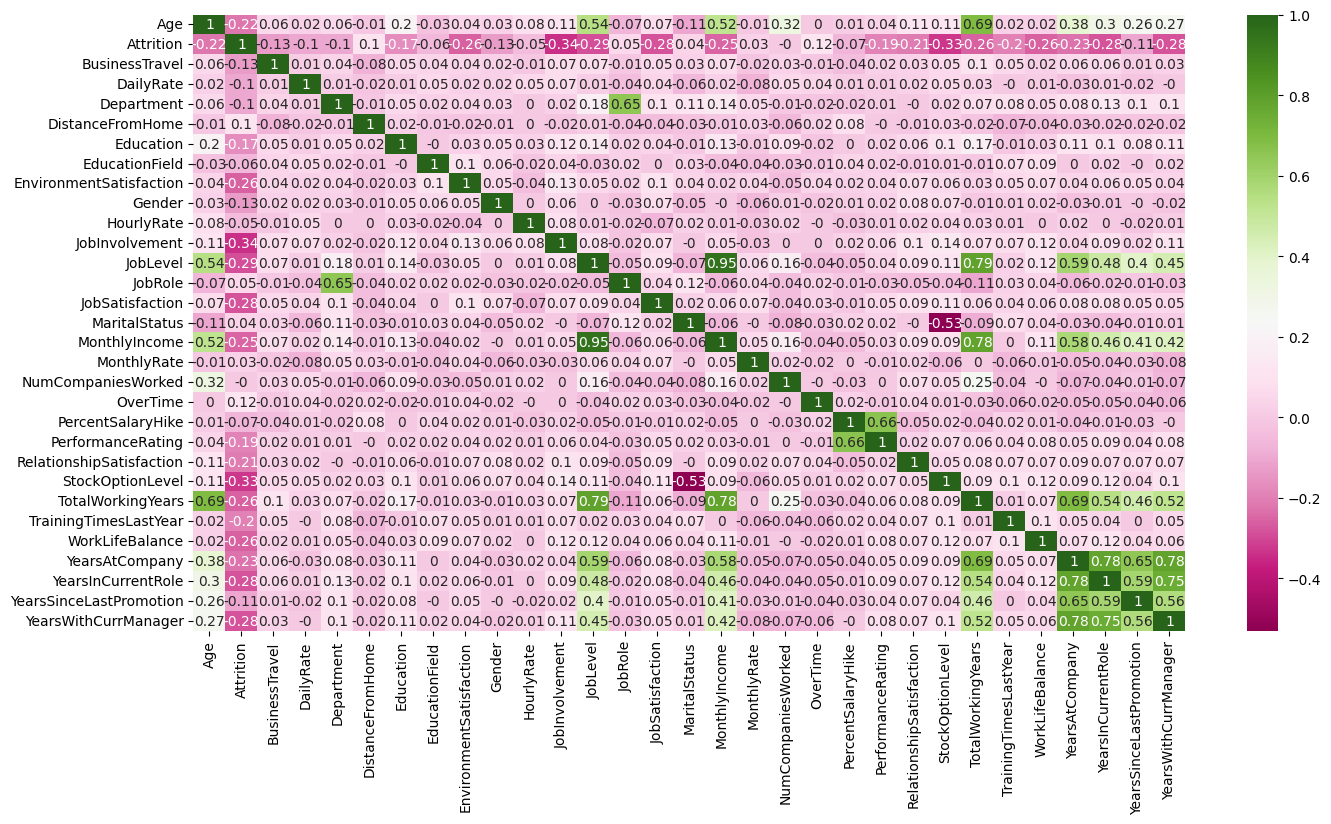

In [25]:
# Checking Heat map of correlation

mp.figure(figsize=(16,8))
sns.heatmap(round(df_hr_bal.corr(),2), cmap = 'PiYG', annot = True)

* TOtal Working Years is showing strong +ve correlation with Age, Job Level, Monthly Income, Years at company

* Years at company, Years in current role, years since last promotion, years with current manager are strong & positively correlated


# Data Cleaning

CHekcing Standard Deviation

In [27]:
# COlumn having min std deviation

df_hr_bal.describe().std()

Age                          860.555058
Attrition                    871.685961
BusinessTravel               871.399607
DailyRate                    754.119143
Department                   871.473149
DistanceFromHome             868.195848
Education                    870.967893
EducationField               871.136706
EnvironmentSatisfaction      871.027499
Gender                       871.659409
HourlyRate                   851.665151
JobInvolvement               871.041961
JobLevel                     871.163081
JobRole                      870.409915
JobSatisfaction              871.027405
MaritalStatus                871.470141
MonthlyIncome               6002.662650
MonthlyRate                 8774.664147
NumCompaniesWorked           870.807449
OverTime                     871.724329
PercentSalaryHike            866.962965
PerformanceRating            870.883682
RelationshipSatisfaction     871.026948
StockOptionLevel             871.591792
TotalWorkingYears            867.738320


High Standard Deviation, applying Min Max Scalr

In [28]:
# Applying Min-Max Scalar

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Split the independednt label for Scaling

df_hr_dta = df_hr_bal.drop('Attrition', axis=1, inplace = False)
df_hr_sca = pd.DataFrame(scaler.fit_transform(df_hr_dta),columns = df_hr_dta.columns.to_list())

df_hr_sca['Attrition']  = df_hr_bal['Attrition']

df_hr_sca.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1


Checking Std Dev

In [29]:
df_hr_sca.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,...,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,0.419920,0.761760,0.482272,0.597121,0.310349,0.441200,0.431062,0.497567,0.526764,0.499253,...,0.504461,0.195188,0.247952,0.430454,0.530549,0.151135,0.196495,0.126602,0.202591,0.500000
std,0.212011,0.325261,0.272691,0.261444,0.277215,0.242409,0.248632,0.351459,0.499384,0.268272,...,0.348218,0.262823,0.185030,0.204954,0.245196,0.145054,0.185928,0.194761,0.194396,0.500101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.500000,0.250716,0.500000,0.071429,0.250000,0.200000,0.333333,0.000000,0.285714,...,0.333333,0.000000,0.125000,0.333333,0.333333,0.050000,0.055556,0.000000,0.058824,0.000000
50%,0.380952,1.000000,0.463851,0.500000,0.250000,0.500000,0.400000,0.666667,1.000000,0.485714,...,0.666667,0.000000,0.200000,0.333333,0.666667,0.125000,0.111111,0.066667,0.117647,0.500000
75%,0.547619,1.000000,0.710630,1.000000,0.500000,0.500000,0.600000,0.666667,1.000000,0.714286,...,0.666667,0.333333,0.325000,0.500000,0.666667,0.200000,0.333333,0.133333,0.352941,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Std deviation is within permissible limits now

checking skewness

In [30]:
df_hr_sca.skew()

Age                         0.505993
BusinessTravel             -1.034073
DailyRate                   0.108620
Department                  0.193671
DistanceFromHome            0.808929
Education                  -0.154377
EducationField              0.586385
EnvironmentSatisfaction    -0.036886
Gender                     -0.107275
HourlyRate                  0.062824
JobInvolvement             -0.292114
JobLevel                    1.279200
JobRole                    -0.362722
JobSatisfaction            -0.040043
MaritalStatus              -0.100649
MonthlyIncome               1.573431
MonthlyRate                -0.006374
NumCompaniesWorked          1.022522
OverTime                    0.937356
PercentSalaryHike           0.864411
PerformanceRating           2.703291
RelationshipSatisfaction   -0.064372
StockOptionLevel            1.299456
TotalWorkingYears           1.321007
TrainingTimesLastYear       0.497901
WorkLifeBalance            -0.413240
YearsAtCompany              2.045664
Y

Few independent labels are having absolute skewness greater than 1, so applying cuberoot transformation to such labels

In [31]:
# Applying cuberoot transformation where skewness is high and not within acceptable limits <=1, also check std deviation

for index in df_hr_sca.columns.to_list():

  if (np.abs(df_hr_sca[index].skew()) >1):
    df_hr_sca[index] = np.cbrt(df_hr_sca[index])

print(df_hr_sca.skew())

df_hr_sca.shape

Age                         0.505993
BusinessTravel             -2.391564
DailyRate                   0.108620
Department                  0.193671
DistanceFromHome            0.808929
Education                  -0.154377
EducationField              0.586385
EnvironmentSatisfaction    -0.036886
Gender                     -0.107275
HourlyRate                  0.062824
JobInvolvement             -0.292114
JobLevel                    0.080376
JobRole                    -0.362722
JobSatisfaction            -0.040043
MaritalStatus              -0.100649
MonthlyIncome               0.532023
MonthlyRate                -0.006374
NumCompaniesWorked         -0.801183
OverTime                    0.937356
PercentSalaryHike           0.864411
PerformanceRating           2.703291
RelationshipSatisfaction   -0.064372
StockOptionLevel            0.383474
TotalWorkingYears          -0.352669
TrainingTimesLastYear       0.497901
WorkLifeBalance            -0.413240
YearsAtCompany             -0.261990
Y

(2466, 31)

In [32]:
print(df_hr_sca.std())

Age                         0.212011
BusinessTravel              0.278247
DailyRate                   0.272691
Department                  0.261444
DistanceFromHome            0.277215
Education                   0.242409
EducationField              0.248632
EnvironmentSatisfaction     0.351459
Gender                      0.499384
HourlyRate                  0.268272
JobInvolvement              0.247179
JobLevel                    0.368911
JobRole                     0.292642
JobSatisfaction             0.356246
MaritalStatus               0.352703
MonthlyIncome               0.173023
MonthlyRate                 0.283813
NumCompaniesWorked          0.266438
OverTime                    0.452883
PercentSalaryHike           0.246044
PerformanceRating           0.297557
RelationshipSatisfaction    0.348218
StockOptionLevel            0.379296
TotalWorkingYears           0.165370
TrainingTimesLastYear       0.204954
WorkLifeBalance             0.245196
YearsAtCompany              0.173845
Y

Both skewness & std devitaion are within permissible limits

Checking Multicollinearity

In [33]:
# Check VIF for all columns & Select features accordingly

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_hr_vif = df_hr_sca.iloc[:,:-1]
vif = pd.DataFrame()
vif['Feature'] = df_hr_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_hr_vif.values,i) for i in range(len(df_hr_vif.columns))]

vif

,Feature,VIF Val
0,Age,10.253801
1,BusinessTravel,10.023438
2,DailyRate,4.189972
3,Department,12.800598
4,DistanceFromHome,2.266312
5,Education,4.620850
6,EducationField,4.122383
7,EnvironmentSatisfaction,3.192434
8,Gender,2.175736
9,HourlyRate,4.462629


In [34]:
# Remove Collinearity by dropping High VIF label , ie, MonthlyIncome

df_hr_vif.drop('MonthlyIncome', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_hr_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_hr_vif.values,i) for i in range(len(df_hr_vif.columns))]

vif

,Feature,VIF Val
0,Age,10.229294
1,BusinessTravel,9.686477
2,DailyRate,4.149527
3,Department,12.800243
4,DistanceFromHome,2.263983
5,Education,4.620542
6,EducationField,4.113630
7,EnvironmentSatisfaction,3.192427
8,Gender,2.169127
9,HourlyRate,4.424079


In [35]:
# Remove Collinearity by dropping High VIF label , ie, TotalWorkingYears

df_hr_vif.drop('TotalWorkingYears', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_hr_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_hr_vif.values,i) for i in range(len(df_hr_vif.columns))]

vif

,Feature,VIF Val
0,Age,7.797850
1,BusinessTravel,9.313702
2,DailyRate,4.097176
3,Department,12.794044
4,DistanceFromHome,2.260205
5,Education,4.599242
6,EducationField,4.057040
7,EnvironmentSatisfaction,3.191952
8,Gender,2.160408
9,HourlyRate,4.405022


In [36]:
# Remove Collinearity by dropping High VIF label , ie, YearsAtCompany

df_hr_vif.drop('YearsAtCompany', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_hr_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_hr_vif.values,i) for i in range(len(df_hr_vif.columns))]

vif

,Feature,VIF Val
0,Age,7.457651
1,BusinessTravel,8.947316
2,DailyRate,4.081380
3,Department,12.789726
4,DistanceFromHome,2.240798
5,Education,4.584454
6,EducationField,4.046031
7,EnvironmentSatisfaction,3.188964
8,Gender,2.160368
9,HourlyRate,4.375920


In [37]:
# Remove Collinearity by dropping High VIF label , ie, Department

df_hr_vif.drop('Department', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_hr_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_hr_vif.values,i) for i in range(len(df_hr_vif.columns))]

vif

,Feature,VIF Val
0,Age,7.447961
1,BusinessTravel,8.904018
2,DailyRate,4.062748
3,DistanceFromHome,2.239377
4,Education,4.584407
5,EducationField,4.041649
6,EnvironmentSatisfaction,3.188545
7,Gender,2.147931
8,HourlyRate,4.370650
9,JobInvolvement,5.755008


All columns are now having acceptable VIFs

Proceeding with Modelling

# Separate Target & Independent Labels

In [38]:
x_df = df_hr_vif
y_df = df_hr_sca['Attrition']

print(x_df.shape, y_df.shape)

print(y_df.sample(2))

x_df.head(2)

(2466, 26) (2466,)
1164    0
1040    0
Name: Attrition, dtype: int64


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.000000,0.71582,0.00,0.25,0.2,0.333333,0.0,0.914286,0.666667,...,1.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.605707,0.00000,0.665029
1,0.738095,0.793701,0.12670,0.25,0.00,0.2,0.666667,1.0,0.442857,0.333333,...,0.0,0.857143,1.0,1.0,0.693361,0.5,0.666667,0.729920,0.40548,0.743960


In [39]:
# Import Libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

*Hypertuning of Random Forest Classifier*

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_split': 4, 'random_state': 78}


In [41]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 9 with accuracy score: 0.9412955465587044


In [42]:
krf = max_rand_st

*Hypertuning: Extra Trees Classifiers*

In [43]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_split': 6, 'random_state': 72}


In [44]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 59 with accuracy score: 0.840080971659919


*Hypertuning: Decision Tree Classifiers*

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 14, 'min_samples_split': 9, 'random_state': 98}


In [46]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 76 with accuracy score: 0.840080971659919


*Hypertuning: KNN*

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 3}


In [48]:
# Training KNN Model

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 3 with accuracy score: 0.8906882591093117


*Hypertuning SVC*

In [49]:
from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 1}


In [50]:
# Training SVC Model

max_acc = 0
max_rand_st = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 14 with accuracy score: 0.8724696356275303


*Hypertuning: ADABOOST*

In [51]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 2, 'n_estimators': 63, 'random_state': 33}


In [52]:
# Training ABC Model

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 56 with accuracy score: 0.7348178137651822


**Best accuracy score obtained for Random Forest Classifier**

# CHECK CV SCORES

In [53]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [RFC, ETC, DTC, ABC, KNN, SV]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),2) )
  print('\n')
  cv_score_list.append(cvs.mean())

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       random_state=78) : Avg CV Score is  0.9


ExtraTreeClassifier(criterion='entropy', max_features=11, min_samples_split=6,
                    random_state=72) : Avg CV Score is  0.8


DecisionTreeClassifier(criterion='entropy', max_features=14,
                       min_samples_split=9, random_state=98) : Avg CV Score is  0.81


AdaBoostClassifier(learning_rate=2, n_estimators=63, random_state=33) : Avg CV Score is  0.68


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') : Avg CV Score is  0.87


SVC(C=1, gamma=0.1, kernel='poly') : Avg CV Score is  0.82




Checking ROC-AUC Curve

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = krf, test_size = 0.2)

RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.9413


Confusion Matrix: 
 [[230   9]
 [ 20 235]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       239
           1       0.96      0.92      0.94       255

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494





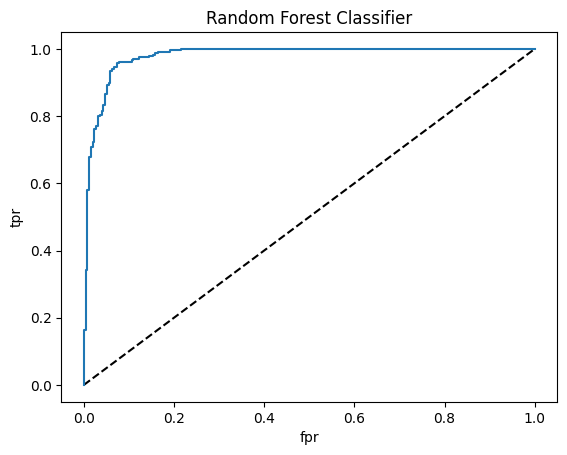

In [55]:
# Checking AUC & ROC

y_pred_prob = RFC.predict_proba(x_test)[:, 0]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

# SAVING THE BEST MODEL

Random Forest classifier, acc_score = 0.944

In [56]:
import joblib

joblib.dump(RFC, 'RFCL_HR.pkl')

['RFCL_HR.pkl']

In [57]:
# Load the saved model

load_HR = joblib.load('RFCL_HR.pkl')

LHR = load_HR

In [58]:
# Function to predict aatrition = yes or no

def pred_attr(input):
  inp = np.array(input)
  type_hrr  =  LHR.predict(inp.reshape(1, -1))
  reg_code = le.inverse_transform(type_hrr)
  pred_lst = [type_hrr, reg_code]

  return pred_lst

In [60]:
# Verifying the Predictions

rws = [59, 24, 42, 167, 65]
for row in rws:
  print('Actual:', y_df[row])
  print('Predicted by Model:', pred_attr(x_df.iloc[row,:])[0])
  print('Decoded value:', pred_attr(x_df.iloc[row,:])[1])
  print('\n')

Actual: 0
Predicted by Model: [0]
Decoded value: ['No']


Actual: 1
Predicted by Model: [1]
Decoded value: ['Yes']


Actual: 1
Predicted by Model: [1]
Decoded value: ['Yes']


Actual: 0
Predicted by Model: [0]
Decoded value: ['No']


Actual: 0
Predicted by Model: [0]
Decoded value: ['No']




**Models seems to be trained & working well**